In [1]:
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/
/*                                                                      */
/*To use this script, first you have to sourse the LocalConfig.sh file. */
/* i.e. source HEPTools/LocalConfigDelphes.sh                           */
/*!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!*/

In [2]:
gROOT->ProcessLine(".x Lib.C");

(int) 0


In [3]:
gSystem->Load("/home/camilo/HEPTools/MADGRAPH/MG5_aMC_v2_5_5_Root6/Delphes/libDelphes.so");

In [4]:
TChain chain1("Delphes");
TChain chain2("Delphes");

In [5]:
chain1.Add("/home/camilo/cms/Scripts_MadGraph_VLFTEO/Datos/BackGround-mumuWCP5/Events/run_01/*.root");
chain2.Add("/home/camilo/cms/MC_VLF-Originales/W+Jets/tag_1_delphes_events01.root");

In [6]:
/*Variables names "std::pair <std::string,std::string> Variable ("NameVariable","Latex Labl #");" */

//std::pair <std::string,std::string> Var1 ("Jet_size","N(Jet)");
std::pair <std::string,std::string> Var1 ("Muon[0].PT","P_{T}(#mu)");
//std::pair <std::string,std::string> Var1 ("Jet[0].PT","p_{T}(Jet) [GeV]");
//std::pair <std::string,std::string> Var1 ("sqrt(2*Muon.PT*MissingET.MET*(1-cos((2*TMath::Pi()+Muon.Phi-MissingET.Phi)%(2*TMath::Pi()))))","MT(#mu,p_{T}^{Miss}) [GeV]");
//std::pair <std::string,std::string> Var1 ("ScalarHT.HT","H_{T}");

In [7]:
//Int_t fNBins = 4; 
//auto fXmin  = 1.0;
//auto fXmax  = 5.0;
//Int_t fNBins = 50; 
//auto fXmin  = 10.0;
//auto fXmax  = 200.0;
Int_t fNBins = 20; 
auto fXmin  = 1.0;
auto fXmax  = 80.0;

In [8]:
Double_t W1D = 100000/chain1.GetEntries();
Double_t W2D = 100000/chain2.GetEntries();

TCut W1 = std::to_string(W1D).c_str();
TCut W2 = std::to_string(W2D).c_str();

In [9]:
chain1.Draw(Form("%s>>myh1(%d,%f,%f)", Var1.first.c_str(),fNBins, fXmin, fXmax),W1,"goff");
TH1D * h1 = (TH1D *)gROOT->FindObject("myh1");
h1->SetName(Form("%s", Var1.second.c_str()));
//h1->SetLineColor(2);

In [10]:
chain2.Draw(Form("%s>>myh2(%d,%f,%f)", Var1.first.c_str(),fNBins, fXmin, fXmax),W2,"goff");
TH1D * h2 = (TH1D *)gROOT->FindObject("myh2");
h2->SetName(Form("%s", Var1.second.c_str()));
//h1->SetLineColor(3);

In [11]:
// Define the Canvas
TCanvas *c = new TCanvas("c", "canvas", 1200, 800);

// Upper plot will be in pad1
TPad *pad1 = new TPad("pad1", "pad1", 0, 0.3, 1, 1.0);
pad1->SetBottomMargin(0.02); // Upper and lower plot are joined
pad1->SetGridx();         // Vertical grid
pad1->Draw();             // Draw the upper pad: pad1
pad1->cd();               // pad1 becomes the current pad
h1->SetStats(0);          // No statistics on upper plot
h1->SetTitle("");
h1->Draw();               // Draw h1
h2->SetTitle("");
h2->Draw("same");         // Draw h2 on top of h

In [12]:
// Do not draw the Y axis label on the upper plot and redraw a small
// axis instead, in order to avoid the first label (0) to be clipped.
h1->GetXaxis()->SetLabelSize(0.0);
//TGaxis *axis = new TGaxis( -5, 20, -5, 220, 20,220,510,"");
//axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
//axis->SetLabelSize(15);
//axis->Draw();

In [13]:
TLegend *legend = new TLegend(0.5,0.75,0.7,0.85);
legend->SetFillStyle(0);
legend->SetBorderSize(0);
legend->SetTextSize(0.04);
legend->SetTextFont(42);
legend->AddEntry(h1, "W+Jets with CP5 Tunes","l");
legend->AddEntry(h2, "W+Jets without CP5 Tunes","l");

legend->Draw();

In [14]:
// lower plot will be in pad
c->cd();          // Go back to the main canvas before defining pad2
TPad *pad2 = new TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
//pad2->SetTopMargin(0.0);
pad2->SetBottomMargin(0.25);
pad2->SetGridx(); // vertical grid
pad2->SetGridy();   
pad2->Draw();
pad2->cd();       // pad2 becomes the current pad

In [15]:
 // Define the ratio plot

//CompareTH1D Comparator(h1,h2);
//h3 = Comparator.CompareChape().at(0);

TH1F *h3 = (TH1F*)h1->Clone("h3");
h3->SetLineColor(kBlack);
//h3->SetMinimum(0.8);  // Define Y ..
//h3->SetMaximum(1.35); // .. range
h3->Sumw2();
h3->Divide(h2);
h3->SetStats(0);      // No statistics on lower plot
h3->SetMarkerStyle(21);
h3->Draw("ep"); 

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [16]:
// h1 settings
   h1->SetLineColor(kBlue+1);
   h1->SetLineWidth(2);

   // Y axis h1 plot settings
   h1->GetYaxis()->SetTitleSize(20);
   h1->GetYaxis()->SetTitleFont(43);
   h1->GetYaxis()->SetTitleOffset(1.55);

   // h2 settings
   h2->SetLineColor(kRed);
   h2->SetLineWidth(2);

   // Ratio plot (h3) settings
   h3->SetTitle(""); // Remove the ratio title

// Y axis ratio plot settings
   h3->GetYaxis()->SetTitle("ratio");
   h3->GetYaxis()->CenterTitle();
   h3->GetYaxis()->SetNdivisions(505);
   h3->GetYaxis()->SetTitleSize(20);
   h3->GetYaxis()->SetTitleFont(43);
   h3->GetYaxis()->SetTitleOffset(1.55);
   h3->GetYaxis()->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   h3->GetYaxis()->SetLabelSize(15);

   // X axis ratio plot settings
   h3->GetXaxis()->SetTitleSize(20);
   h3->GetXaxis()->SetTitleFont(43);
   h3->GetXaxis()->SetTitleOffset(4.);
   h3->GetXaxis()->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   h3->GetXaxis()->SetLabelSize(15);
   h3->GetXaxis()->SetTitle(Form("%s", Var1.second.c_str()));

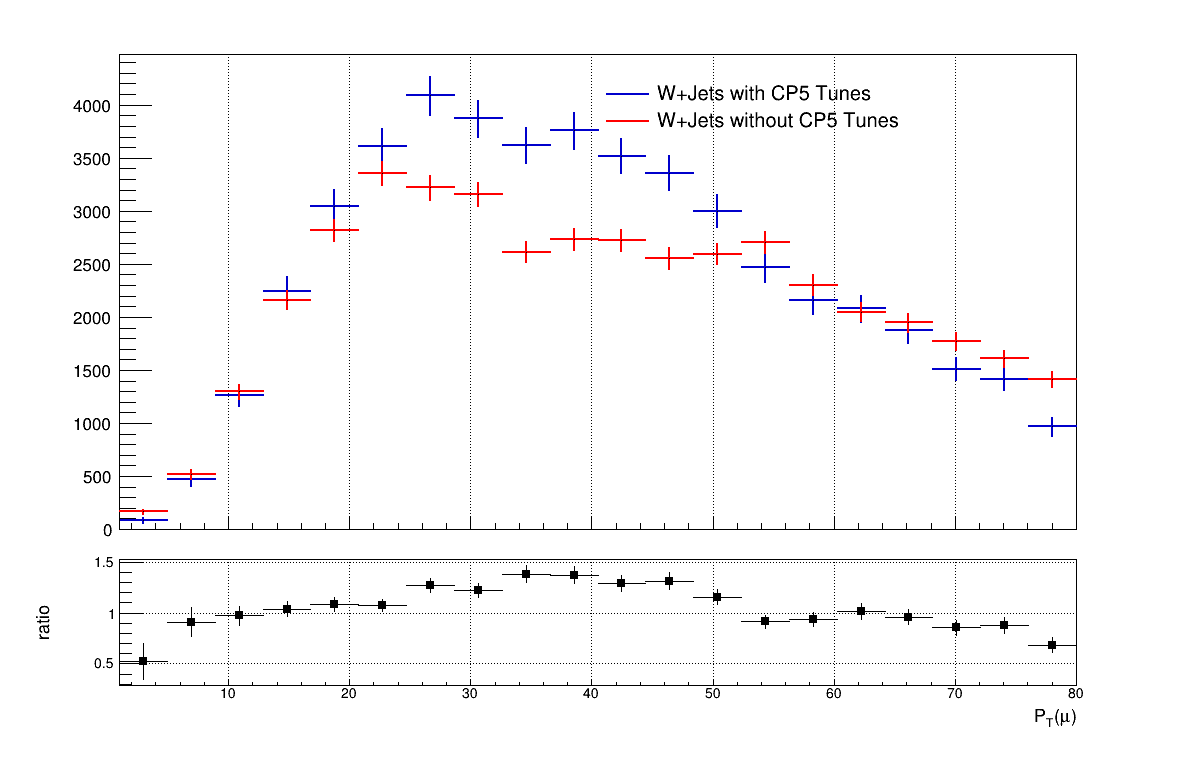

In [17]:
c->Draw();

In [20]:
//c->SaveAs("WJets_NJetCP5NoCP5comparizon.pdf","pdf");
//c->SaveAs("WJet_Jet0PTCP5NoCP5comparizon.pdf","pdf");
c->SaveAs("WJet_Mu0PTCP5NoCP5comparizon.pdf","pdf");

Info in <TCanvas::Print>: pdf file WJet_Mu0PTCP5NoCP5comparizon.pdf has been created


In [19]:
Float_t bins[] = { 10, 20, 60, 65, 72, 80, 90, 100, 120, 160 };
Int_t  binnum = sizeof(bins)/sizeof(Float_t) - 1; // or just = 9
TH1F* h4 = new TH1F("n","t", binnum, bins);